In [43]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import numpy as np
import matplotlib.pyplot as plt

In [44]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()


In [45]:
x_train = x_train/255.0
x_test =x_test/255.0

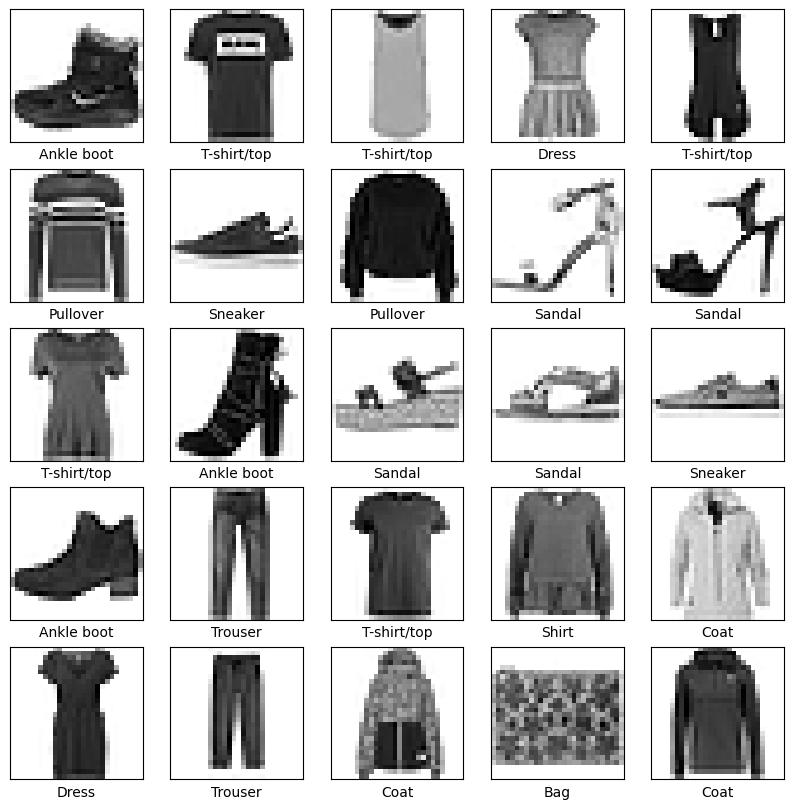

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [47]:
x_train[0].shape

(28, 28)

In [48]:
model = models.Sequential()
model.add(layers.Flatten(input_shape =(28,28)))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(10))

In [49]:
model.compile(optimizer ='adam',
             loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics =['accuracy'])

In [64]:
history = model.fit(x_train,y_train,epochs =50,validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1768 - accuracy: 0.9328 - val_loss: 0.3553 - val_accuracy: 0.8899
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1751 - accuracy: 0.9338 - val_loss: 0.3554 - val_accuracy: 0.8867
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1708 - accuracy: 0.9348 - val_loss: 0.3568 - val_accuracy: 0.8921
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1660 - accuracy: 0.9370 - val_loss: 0.3756 - val_accuracy: 0.8883
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1615 - accuracy: 0.9384 - val_loss: 0.3795 - val_accuracy: 0.8864
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1581 - accuracy: 0.9396 - val_loss: 0.3881 - val_accuracy: 0.8875
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1563 - accuracy: 0.9400 - val_loss: 0.4034 - val_accuracy:

313/313 - 0s - loss: 0.7120 - accuracy: 0.8822 - 369ms/epoch - 1ms/step


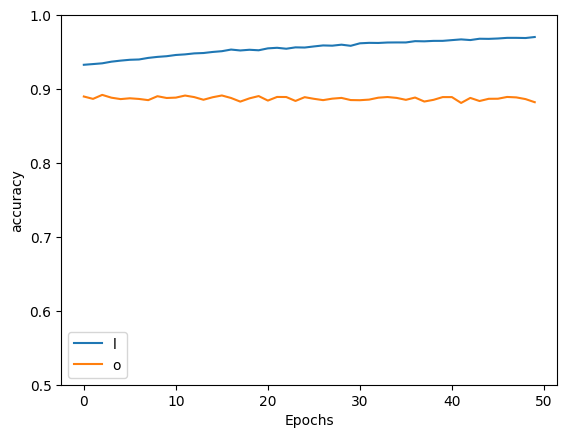

In [65]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legend('lower right')


test_loss,test_lacc = model.evaluate(x_test,y_test, verbose=2)

In [66]:
print(test_lacc)

0.8822000026702881


In [68]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [69]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [55]:
predictions[0]

array([3.1245223e-10, 5.3951458e-11, 5.6027974e-13, 6.4989247e-13,
       5.6637424e-16, 2.4629884e-07, 1.2186531e-12, 1.2910935e-04,
       6.4793176e-10, 9.9987066e-01], dtype=float32)

In [56]:
np.argmax(predictions[0])

9

In [57]:
y_test[0]

9

In [70]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

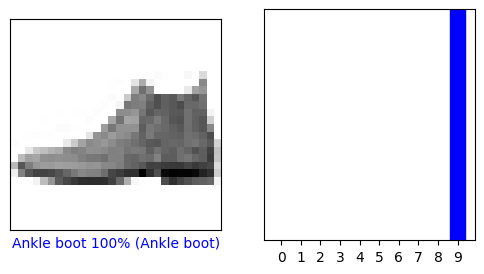

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

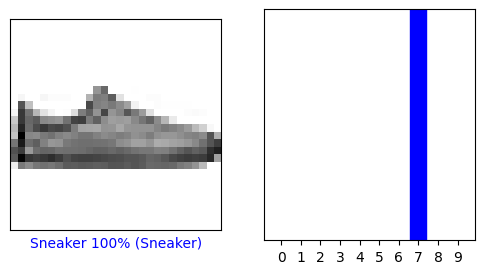

In [71]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

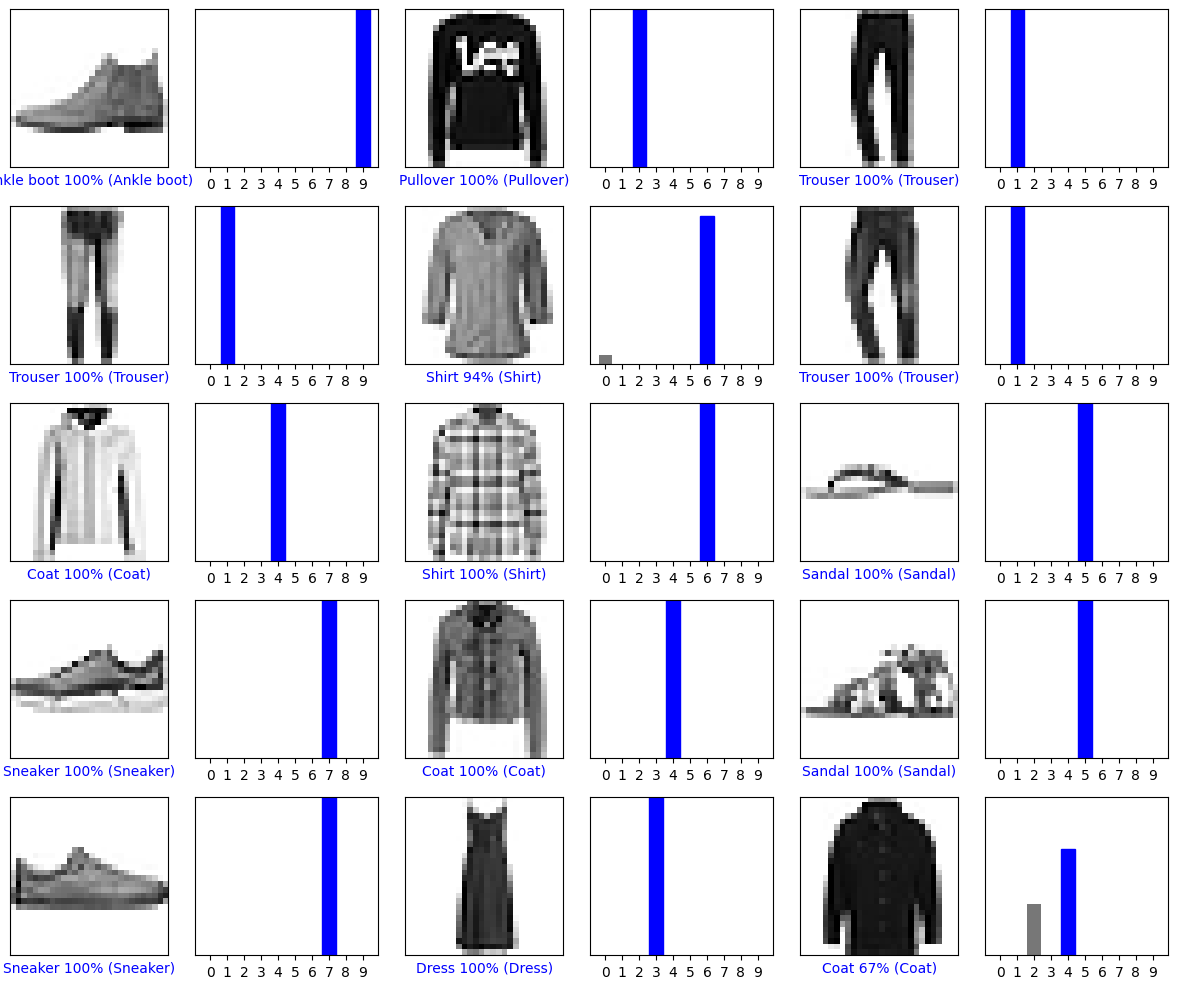

In [72]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()